In [1]:
import pandas as pd 
import numpy as np 
import os
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as  plt 


In [2]:
audio_dataset_path="Data/genres_original"
metadata=pd.read_csv("Data/features_30_sec.csv")
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
def features_extractor(file):

    audio, sample_rate =librosa.load(file_name, res_type ='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

    mfccs_scaled_features= np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [4]:
metadata.drop(labels=552,axis=0,inplace=True)

In [5]:
from tqdm import tqdm

extracted_features=[]

for index_num, row in tqdm(metadata.iterrows()):

    try:

        final_class_labels= row["label"]

        file_name = os.path.join(os.path.abspath(audio_dataset_path), final_class_labels+'/',str(row["filename"]))

        data=features_extractor(file_name)

        extracted_features.append([data, final_class_labels])

    except Exception as e:

        print("Error: (e)")

        continue


59it [00:31, 11.30it/s]C:\Users\HEMANTH\AppData\Local\Temp\ipykernel_11740\4050924373.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate =librosa.load(file_name, res_type ='kaiser_fast')
c:\Users\HEMANTH\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
62it [00:31, 14.53it/s]

Error: (e)


495it [01:01,  9.42it/s]

Error: (e)


556it [01:06, 16.07it/s]

Error: (e)


787it [01:22, 18.65it/s]

Error: (e)


999it [01:35, 10.48it/s]


In [6]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['features','class'])
extracted_features_df.head()


,features,class
0,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
1,"[-207.52383, 123.98514, 8.947019, 35.86715, 2....",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686693,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855278, 1....",blues
4,"[-160.35417, 126.20948, -35.581394, 22.139256,...",blues


In [7]:
extracted_features_df['class'].value_counts()

class
classical    100
country      100
disco        100
metal        100
reggae       100
rock         100
blues         99
hiphop        99
pop           99
jazz          98
Name: count, dtype: int64

In [8]:
X=np.array(extracted_features_df['features'].tolist())
Y=np.array(extracted_features_df['class'].tolist())


In [9]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

Y=to_categorical(labelencoder.fit_transform(Y)) 

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [11]:
X_train

array([[-1.4286499e+02,  8.3642670e+01,  2.1931343e+01, ...,
        -2.4345458e+00, -3.6486013e+00, -5.8733398e-01],
       [-1.5562473e+02,  5.7045925e+01, -3.5298454e+01, ...,
        -4.4061432e+00, -1.4106216e+00, -6.7811246e+00],
       [-2.8587192e+02,  1.3868126e+02,  1.9889305e+01, ...,
        -6.8888903e-01,  4.5740891e+00,  3.5162828e+00],
       ...,
       [-3.5695076e+01,  1.1543363e+02, -4.0627041e+01, ...,
        -3.2086132e+00, -1.1881541e+00, -1.5647129e+00],
       [-5.0615818e+01,  8.5048317e+01,  3.5498574e+00, ...,
        -1.5091492e+00, -2.3704557e+00, -2.1517458e+00],
       [-1.2966246e+02,  1.0403299e+02, -2.6970751e+01, ...,
        -1.7136624e-02,  5.6614465e-01, -1.5387223e+00]], dtype=float32)

In [12]:
print(X_train.shape)

print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(796, 40)
(199, 40)
(796, 10)
(199, 10)


In [13]:
import tensorflow as ts 
print(ts.__version__)

2.16.1


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn import metrics


In [15]:
num_label=Y.shape[1]

In [16]:

model=Sequential()
model.add(Dense (1024, input_shape=(40,), activation="relu"))   
model.add(Dropout (0.3))
model.add(Dense (512, activation="relu"))
model.add(Dropout (0.3))
model.add(Dense (256, activation="relu"))
model.add(Dropout (0.3))
model.add(Dense (128, activation="relu"))
model.add(Dropout (0.3))
model.add(Dense (64, activation="relu"))
model.add(Dropout (0.3))
model.add(Dense (32, activation="relu"))
model.add(Dropout (0.3))
###final layer
model.add(Dense (num_label, activation="softmax"))

c:\Users\HEMANTH\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │        41,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 741,674 (2.83 MB)

 Trainable params: 741,674 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy' ], optimizer='adam')


In [19]:
import time
t=time.localtime()
current_time = time.strftime("%Y%m%d_%H%M%S")


In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
num_epochs = 100
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath=f'saved_models/audio_classification_{current_time}.keras', verbose=1, save_best_only=True)

start = datetime.now()
history = model.fit(X_train, Y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data= (X_test, Y_test), callbacks = [checkpointer])
duration=datetime.now() - start
print("Training completed in",duration)

Epoch 1/100
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0847 - loss: 6.6299
Epoch 1: val_loss improved from inf to 2.28756, saving model to saved_models/audio_classification_20240320_185152.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 137ms/step - accuracy: 0.0877 - loss: 6.3407 - val_accuracy: 0.1307 - val_loss: 2.2876
Epoch 2/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1092 - loss: 2.8414
Epoch 2: val_loss improved from 2.28756 to 2.23000, saving model to saved_models/audio_classification_20240320_185152.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1139 - loss: 2.7996 - val_accuracy: 0.1809 - val_loss: 2.2300
Epoch 3/100
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1244 - loss: 2.3817
Epoch 3: val_loss improved from 2.23000 to 2.21060, saving model to saved_models/audio_classification_20240320_185152.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1229 - loss: 2.3800 - val_accuracy: 0.2060 - val_loss: 2.2106
Epoch 4/100
21/25 ━━━━━━

In [21]:
model.evaluate(X_test,Y_test,verbose=0)[1]

0.623115599155426

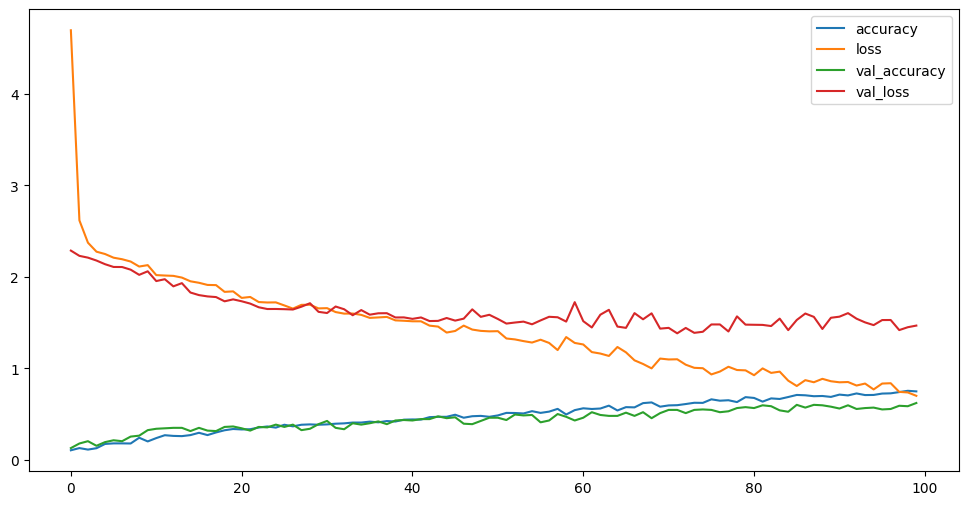

In [22]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()

In [23]:
model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[2.68145720e-03, 5.02202252e-04, 4.14662389e-03, ...,
        1.77231748e-02, 2.49561384e-01, 2.70328391e-02],
       [1.15229458e-01, 1.25232646e-02, 1.11141145e-01, ...,
        1.72109958e-02, 1.44600227e-01, 1.85029626e-01],
       [9.99999881e-01, 1.42581068e-22, 1.20104900e-07, ...,
        1.62872721e-26, 1.54765970e-24, 8.55582827e-10],
       ...,
       [2.08683256e-02, 1.13463041e-03, 1.05468757e-01, ...,
        2.95788683e-02, 4.40397784e-02, 2.99677014e-01],
       [5.84893748e-02, 9.31922719e-03, 2.28409067e-01, ...,
        4.18420248e-02, 1.49933144e-01, 1.43418863e-01],
       [2.64416117e-24, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.66140618e-36, 3.51621566e-07]], dtype=float32)

In [28]:
filename = "removed/blues.00059.wav"
# filename="removed/pop.00086.wav"
# filename="removed/hiphop.00092.wav"
audio,sample_rate=librosa.load(filename,res_type='kaiser_fast')
mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
print(mfccs_features)
mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
predicted_label=model.predict(mfccs_scaled_features)
classes_x=np.argmax(predicted_label,axis=1)

print(classes_x)
prediction_class=labelencoder.inverse_transform(classes_x)
prediction_class

[[-205.54762   -139.93362    -81.03723   ...  -77.67139    -87.069664
  -105.30947  ]
 [ 103.96109     99.00069     91.112564  ...  113.95621    103.46744
   109.39392  ]
 [   8.334707   -12.615959   -20.030922  ...  -28.042583   -33.78479
   -35.25741  ]
 ...
 [  -1.3937321   -1.4180686   -2.40104   ...    2.8089356    2.0799456
     1.3722044]
 [   5.9239616    6.8311663    3.3933864 ...   -1.4328363    6.938568
     7.4404716]
 [   1.1817778   -4.1948204   -8.170178  ...   -6.2766504   -0.7672815
    -3.0155692]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0]


array(['blues'], dtype='<U9')